# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 Preprocessing

 Training

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7316 files belonging to 4 classes.


 Validation Image

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1829 files belonging to 4 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.20))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.3)) 

In [13]:

cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,003,760 (57.23 MB)

 Trainable params: 15,003,760 (57.23 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=11)

Epoch 1/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.6948 - loss: 1.1075 - val_accuracy: 0.8983 - val_loss: 0.2650
Epoch 2/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 220s 962ms/step - accuracy: 0.9271 - loss: 0.2001 - val_accuracy: 0.9557 - val_loss: 0.1427
Epoch 3/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9594 - loss: 0.1094 - val_accuracy: 0.9420 - val_loss: 0.1519
Epoch 4/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 224s 979ms/step - accuracy: 0.9660 - loss: 0.0952 - val_accuracy: 0.9650 - val_loss: 0.1298
Epoch 5/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 223s 973ms/step - accuracy: 0.9722 - loss: 0.0746 - val_accuracy: 0.9650 - val_loss: 0.1151
Epoch 6/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 224s 977ms/step - accuracy: 0.9781 - loss: 0.0556 - val_accuracy: 0.9623 - val_loss: 0.1218
Epoch 7/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 222s 968ms/step - accuracy: 0.9801 - loss: 0.0469 - val_accuracy: 0.9650 - val_loss: 0.1121
Epoch 8/11
229/229 ━━━━━━━━━━━━━━━━━━━━ 223s 973ms/step - accuracy: 0.9891 - loss:

## Evaluating Model

In [17]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

229/229 ━━━━━━━━━━━━━━━━━━━━ 42s 183ms/step - accuracy: 0.9915 - loss: 0.0242
Training accuracy: 0.9917988181114197


In [18]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9593 - loss: 0.2380
Validation accuracy: 0.9661017060279846


### Saving Model

In [19]:
cnn.save('trained_plant_disease_model_corn.keras')

In [20]:

import json
with open('training_hist_corn.json','w') as f:
  json.dump(training_history.history,f)

In [21]:
training_history.history

{'accuracy': [0.8318753242492676,
  0.9423182010650635,
  0.9624111652374268,
  0.9708857536315918,
  0.972662627696991,
  0.9767632484436035,
  0.9808638691902161,
  0.9864680171012878,
  0.9857845902442932,
  0.9889283776283264,
  0.9856479167938232],
 'loss': [0.4930638372898102,
  0.15227486193180084,
  0.10129772126674652,
  0.08235486596822739,
  0.07502500712871552,
  0.05835982784628868,
  0.04602077603340149,
  0.0385415181517601,
  0.041399579495191574,
  0.03342676907777786,
  0.038762759417295456],
 'val_accuracy': [0.8983050584793091,
  0.9557135105133057,
  0.9420448541641235,
  0.9650081992149353,
  0.9650081992149353,
  0.9622744917869568,
  0.9650081992149353,
  0.9579004645347595,
  0.9633679389953613,
  0.9644614458084106,
  0.9661017060279846],
 'val_loss': [0.26502567529678345,
  0.14265409111976624,
  0.1518930345773697,
  0.12984229624271393,
  0.11513683199882507,
  0.12175340950489044,
  0.11212034523487091,
  0.1409604549407959,
  0.13062553107738495,
  0.1330

In [22]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


 Accuracy Visualization

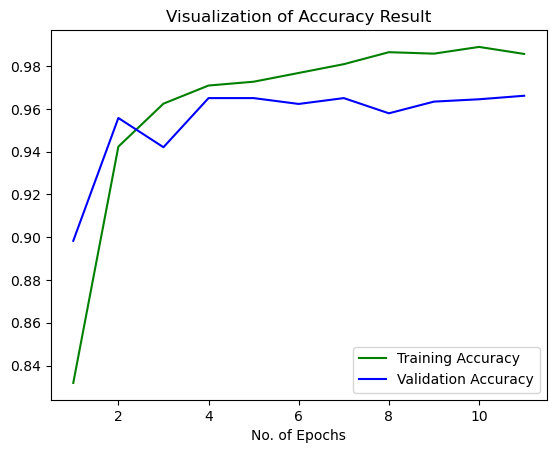

In [23]:
epochs = [i for i in range(1,12)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

other metrics for model evaluation

In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1829 files belonging to 4 classes.


In [26]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1829/1829 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step


In [27]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [28]:
Y_true

<tf.Tensor: shape=(1829,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [29]:
predicted_categories

<tf.Tensor: shape=(1829,), dtype=int64, numpy=array([0, 0, 2, ..., 3, 3, 3], dtype=int64)>

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [31]:

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.89      0.92       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.94       477
                            Corn_(maize)___healthy       0.99      1.00      1.00       465

                                          accuracy                           0.97      1829
                                         macro avg       0.97      0.96      0.96      1829
                                      weighted avg       0.97      0.97      0.97      1829



### Confusion Matrix Visualization

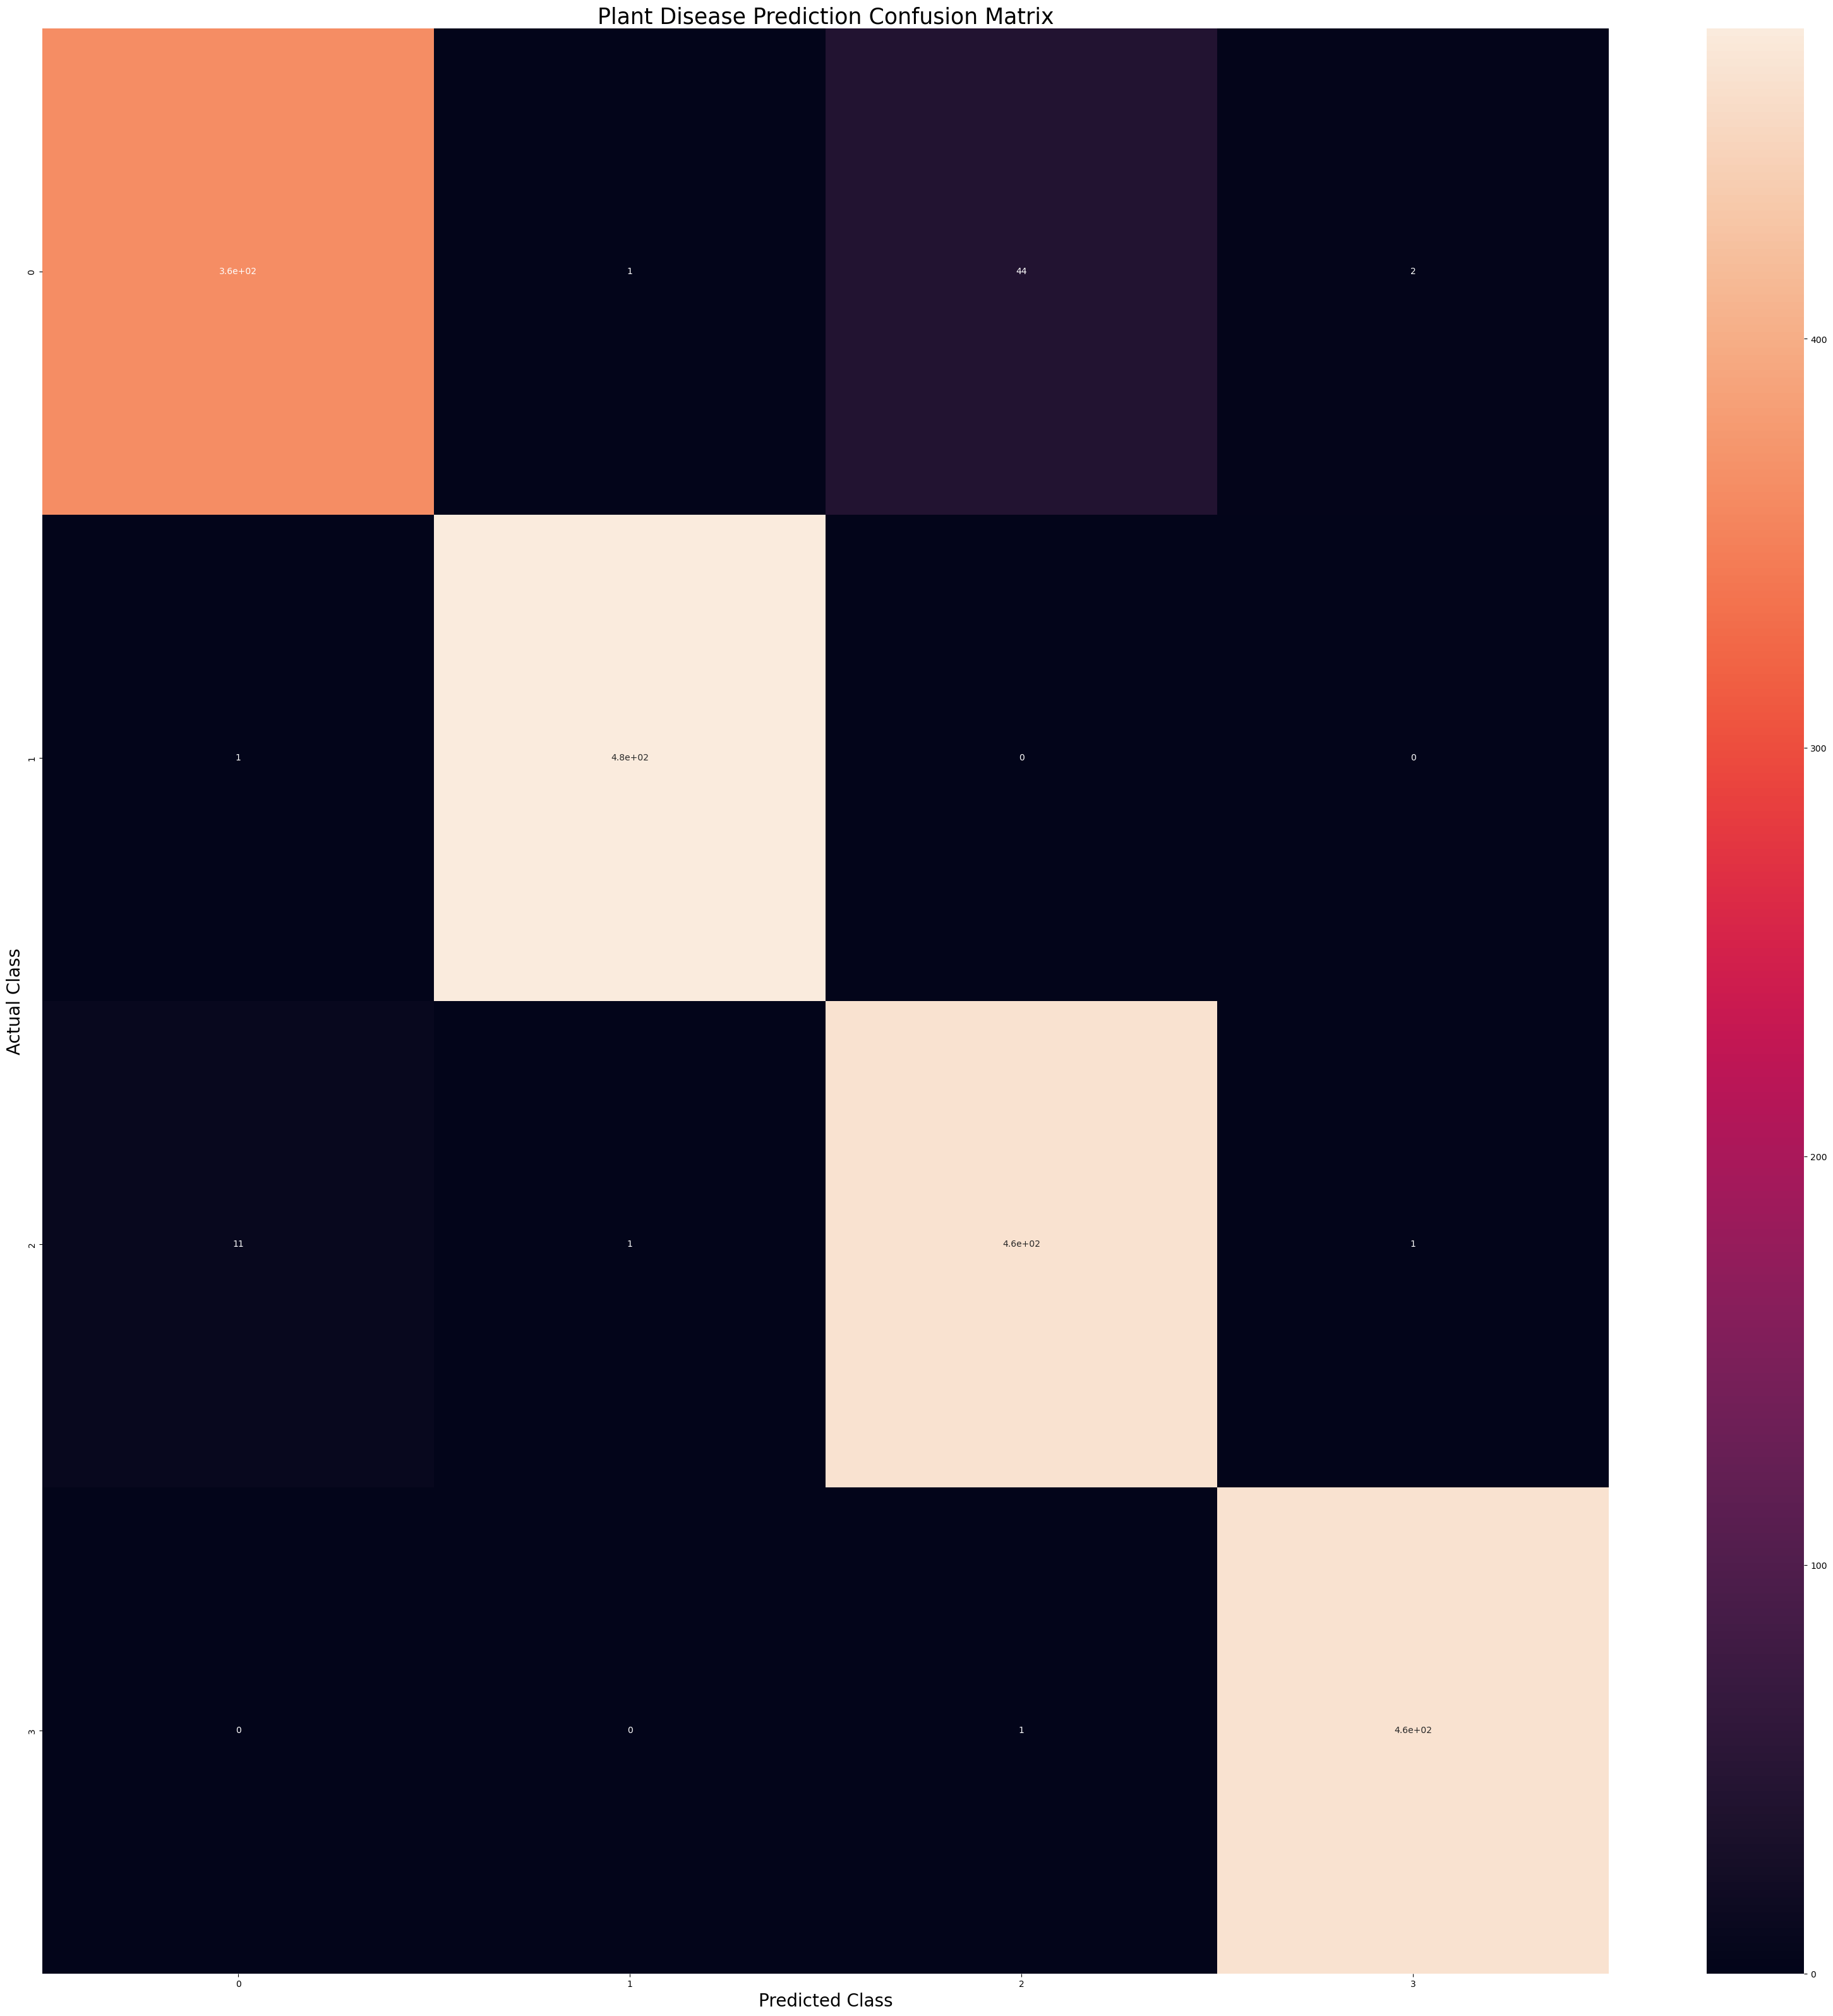

In [32]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()